# Monoidal categories in DisCoPy

In order to use the advanced features of `lambeq` and extend it, an understanding of DisCoPy is required. DisCoPy is the tool of choice for dealing with monoidal categories in Python, and it is widely used for DisCoCat and _Categorical Quantum Mechanics_ (CQM) research.

## Categories

A *category* consists of a collection of *objects* $A, B, C, \ldots$ and a collection of *morphisms* between objects of the form $f: A \to B, g: B \to C, h: C \to D, \ldots$, such that:

* Morphisms with matching types compose. For example, $f: A \to B$ and $g: B \to C$ can compose to make $g \circ f: A \to C$, but not $f \circ g$.
* Morphisms compose in an associative way: $(h \circ g) \circ f = h \circ (g \circ f)$
* Each object has an identity arrow: $1_B \circ f = f = f \circ 1_A$

These definitions are implicitly encoded in this *commutative diagram*: any directed path between two specific objects represents equal morphisms.
<center>
    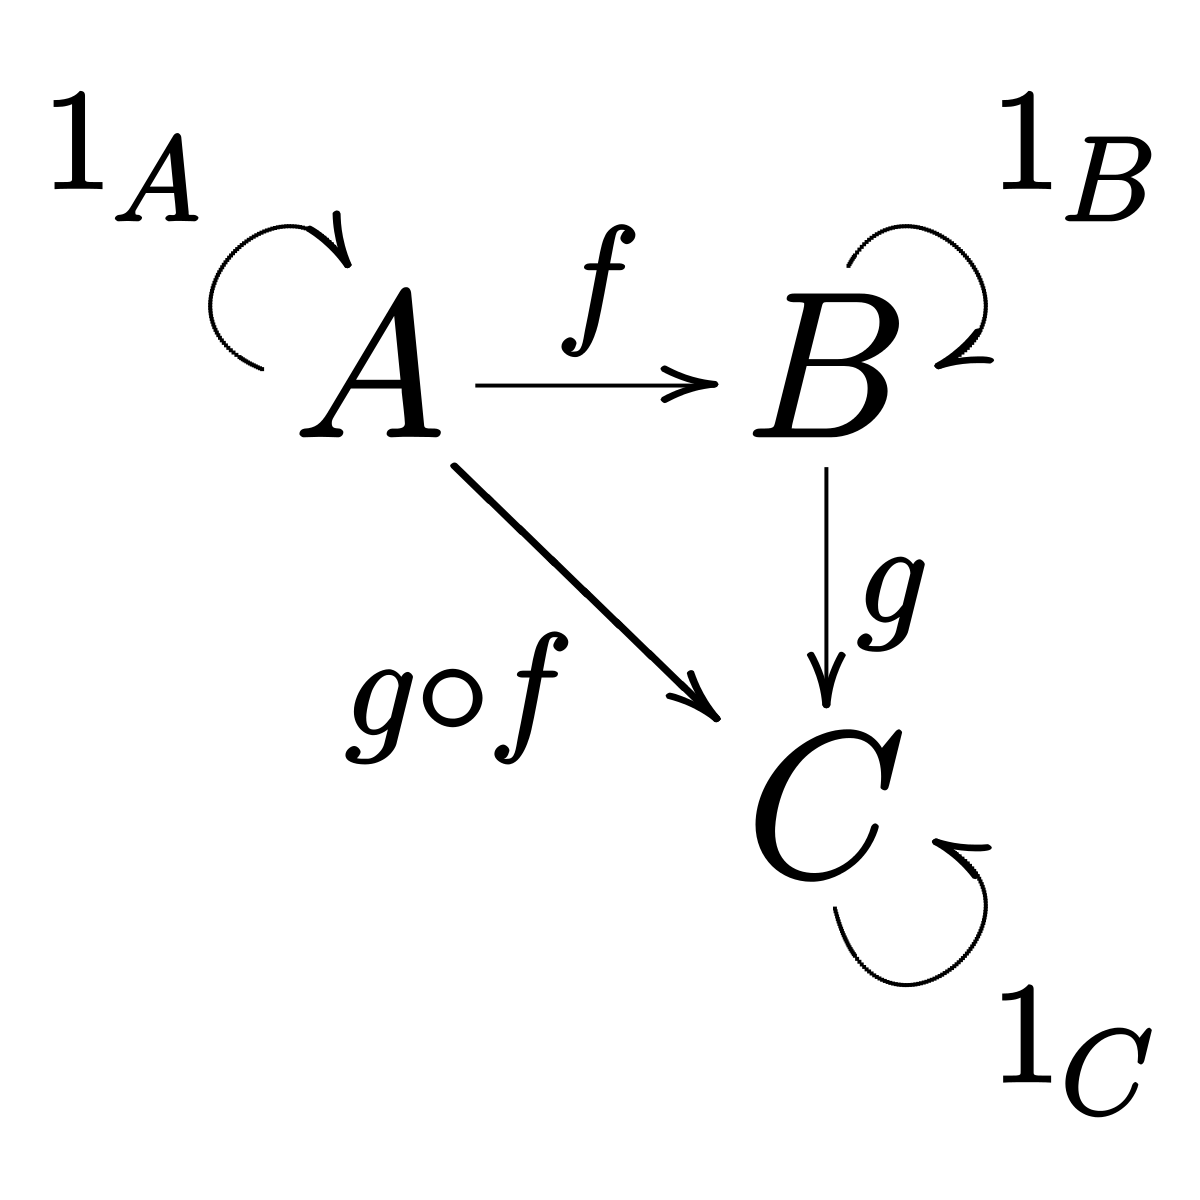
</center>

The [discopy.cat](https://discopy.readthedocs.io/en/main/discopy/cat.html) module is a framework for *free* categories: we first define generating objects with the [Ob](https://discopy.readthedocs.io/en/main/_autosummary/discopy.cat.Ob.html) class and generating morphisms with the [Box](https://discopy.readthedocs.io/en/main/_autosummary/discopy.cat.Box.html) class, then build composite morphisms by freely combining the generating morphisms using forward composition `<<` (equivalent to $\circ$) and backward composition `>>`.

In [1]:
from discopy.cat import Box, Ob, Id 

A, B, C, D = Ob('A'), Ob('B'), Ob('C'), Ob('D')

f = Box('f', A, B)
g = Box('g', B, C)
h = Box('h', C, D)

# the codomain of f and domain of g match, so f and g compose
g << f
assert f.cod == g.dom == B
assert g << f == f >> g

# associativity
assert h << (g << f) == h << g << f == (h << g) << f

# identity
assert f << Id(A) == f == Id(B) << f

As mentioned above, in DisCoPy the generating morphisms are defined using the [Box](https://discopy.readthedocs.io/en/main/_autosummary/discopy.cat.Box.html) class. When morphisms are composed, they combine to become an [Arrow](https://discopy.readthedocs.io/en/main/_autosummary/discopy.cat.Arrow.html). Compared to traditional category theory notation, DisCoPy prefers to use backwards composition `>>`, where `f >> g` should be read as "`f` followed by `g`".

In [2]:
# only arrows that 'type-check' can be composed
arrow = h << g << f
assert arrow == f >> g >> h

print(repr(arrow))

Arrow(dom=Ob('A'), cod=Ob('D'), boxes=[Box('f', Ob('A'), Ob('B')), Box('g', Ob('B'), Ob('C')), Box('h', Ob('C'), Ob('D'))])


An [Arrow](https://discopy.readthedocs.io/en/main/_autosummary/discopy.cat.Arrow.html) behaves like a `List[Box]`: it can be indexed, sliced, or even reversed. Reversing a morphism actually performs the *dagger* operation, which is the abstract notion of a dagger in quantum mechanics and linear algebra.

In [3]:
print(arrow)
print(f'Indexing:', arrow[0])
print(f'Slicing:', arrow[1:])
print(f'Reversing (dagger):', arrow[::-1])

f >> g >> h
Indexing: f
Slicing: g >> h
Reversing (dagger): h[::-1] >> g[::-1] >> f[::-1]


## Monoidal categories
A *monoidal category* is a category equipped with the *monoidal product* $\otimes$ and *monoidal unit* $I$ and has the following properties:

* objects can be combined to return another object (e.g $A \otimes B$)
* morphisms can be combined to return another morphism ($(f: A \to B) \otimes (g: C \to D) = f \otimes g: A \otimes C \to B \otimes D$).
* $\otimes$ is associative on objects: $(A \otimes B) \otimes C = A \otimes (B \otimes C)$
* $\otimes$ is associative on morphisms: $(f \otimes g) \otimes h = f \otimes (g \otimes h)$
* $I$ is the identity on objects for $\otimes$: $A \otimes I= A = I \otimes A$
* $1_I$ is the identity on arrows for $\otimes$: $f \otimes 1_I = f = 1_I \otimes f$

Built upon [discopy.cat](https://discopy.readthedocs.io/en/main/discopy/cat.html), the [discopy.monoidal](https://discopy.readthedocs.io/en/main/discopy/monoidal.html) module can be used to define and manipulate free monoidal categories: the generating objects are defined with the [Ty
](https://discopy.readthedocs.io/en/main/_autosummary/discopy.monoidal.Ty.html) class, and the generating morphisms with the [Box](https://discopy.readthedocs.io/en/main/_autosummary/discopy.monoidal.Box.html) class; the composite objects are built using `@` and the composite morphisms using `>>` and `<<`.

In [4]:
from discopy.monoidal import Box, Id, Ty

A, B, C = Ty('A'), Ty('B'), Ty('C')

f = Box('f', A, B)
g = Box('g', B, C)
h = Box('h', B, A)

# combining objects
A @ B
# combining arrows
f @ g

# associativity
assert (A @ B) @ C == A @ B @ C == A @ (B @ C)
assert (f @ g) @ h == f @ g @ h == f @ (g @ h) 

# monoidal unit
assert A @ Ty() == A == Ty() @ A
assert f @ Id(Ty()) == f == Id(Ty()) @ f

Monoidal categories have an elegant graphical calculus, which allow them to be drawn and manipulated graphically. 

Diagram(dom=Ty('A', 'A'), cod=Ty('B'), boxes=[Box('x', Ty('A'), Ty('A')), Box('y', Ty('A', 'A'), Ty('B'))], offsets=[0, 0])


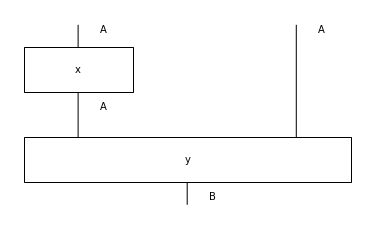

In [5]:
x = Box('x', A, A)
y = Box('y', A @ A, B)

diagram = x @ Id(A) >> y
print(repr(diagram))
diagram.draw(figsize=(5, 3))

A [Ty](https://discopy.readthedocs.io/en/main/_autosummary/discopy.monoidal.Ty.html) can be indexed, sliced, or even reversed, just like a `List[Ob]`.

In [6]:
t = A @ B @ C

print(t)
print(repr(t))

print('Indexing:', t[0])
print(f'Slicing:', t[1:])
print(f'Reversing:', t[::-1])

A @ B @ C
Ty('A', 'B', 'C')
Indexing: A
Slicing: B @ C
Reversing: C @ B @ A


It is often desirable to select a single object from a compound [Ty](https://discopy.readthedocs.io/en/main/_autosummary/discopy.monoidal.Ty.html) and use it as a type, since a [monoidal.Box](https://discopy.readthedocs.io/en/main/_autosummary/discopy.monoidal.Box.html) expects its domain and codomain to be types (`Ty`) rather than objects (`Ob`). This can be achieved using a 1-element slice, as in the following code:

In [7]:
# indexing a Ty gives an Ob back
print('Indexing (Ob):', repr(t[0]))

# trick to get a Ty with a single object
print('Indexing (Ty):', repr(t[0:1]))

Indexing (Ob): Ob('A')
Indexing (Ty): Ty('A')


Similarly, a [Diagram](https://discopy.readthedocs.io/en/main/_autosummary/discopy.monoidal.Diagram.html) behaves like a `List[Box]`, so it can be indexed, sliced, and reversed. Reversing a diagram performs the dagger operation.

x @ Id(A) >> y
Indexing: x @ Id(A)
Slicing: y
Reversing (dagger): y[::-1] >> x[::-1] @ Id(A)

Dagger operation:


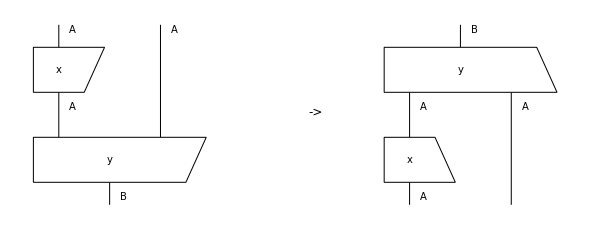

In [8]:
print(diagram)
print(f'Indexing:', diagram[0])
print(f'Slicing:', diagram[1:])
print(f'Reversing (dagger):', diagram[::-1])

from discopy import drawing

print('\nDagger operation:')
# boxes are drawn as trapeziums to demonstrate the reflection along the horizontal axis
drawing.equation(diagram, diagram[::-1], symbol='->', asymmetry=0.2, figsize=(8, 3))

The internal representation of a diagram contains the domain (input type), codomain (output type), the list of boxes that make up the diagram, and a list of offsets for the boxes. For example, by adjusting the offset of the first box to 1, the box is then connected to the second wire rather than the first.

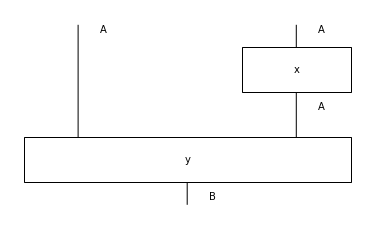

In [9]:
from discopy.monoidal import Diagram

offset_diagram = Diagram(
    dom=Ty('A', 'A'), cod=Ty('B'),
    boxes=[Box('x', Ty('A'), Ty('A')), Box('y', Ty('A', 'A'), Ty('B'))],
    offsets=[1, 0])

offset_diagram.draw(figsize=(5, 3))

A monoidal category equipped with a *swap* is known as a _symmetric_ monoidal category. Nested swaps can be defined using the [Diagram.swap()](https://discopy.readthedocs.io/en/main/_autosummary/discopy.monoidal.Diagram.html#discopy.monoidal.Diagram.swap) method.

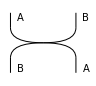

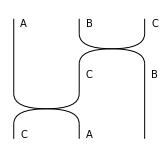

In [10]:
from discopy.monoidal import Swap

Swap(A, B).draw(figsize=(1, 1))
Diagram.swap(A @ B, C).draw(figsize=(2, 2))

<div class="alert alert-info">

**Note**

In a strict mathematical sense, the associativity and unit rules of $\otimes$ in a monoidal category only hold up to *isomorphism*. As a consequence, this definition requires extra morphisms such as unitors and associators, as well as complicated coherence conditions. Instead, DisCoPy strictly enforces the rules to hold up to equality, so such coherence conditions are unnecessary. This greatly simplifies its practical use.
</div>

## Rigid monoidal categories

A *rigid category* is a monoidal category where every object $A$ has a *left adjoint* $A^l$ and *right adjoint* $A^r$. The left adjoint of the right adjoint of a type is equal to the type itself, and vice versa: $(A^r)^l = A = (A^l)^r$

In the [discopy.rigid](https://discopy.readthedocs.io/en/main/discopy/rigid.html) module, the adjoint of a rigid type [Ty](https://discopy.readthedocs.io/en/main/_autosummary/discopy.rigid.Ty.html) is obtained using the `.l` and `.r` properties:

In [11]:
from discopy.rigid import Box, Id, Ty

A = Ty('A')

print(A.l, 'is represented as', repr(A.l))
print(A.r, 'is represented as', repr(A.r))

assert A.r.l == A == A.l.r

A.l is represented as Ty(Ob('A', z=-1))
A.r is represented as Ty(Ob('A', z=1))


The key property of a rigid category is the existence of *cups* and *caps* between an object and its adjoint: these are special morphisms that are drawn as bent wires in diagrammatic notation. 

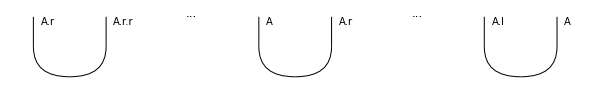

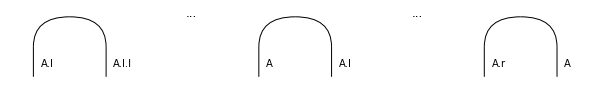

In [12]:
from discopy.rigid import Cap, Cup

drawing.equation(Cup(A.r, A.r.r), Cup(A, A.r), Cup(A.l, A), figsize=(8, 1), symbol='...')
drawing.equation(Cap(A.l, A.l.l), Cap(A, A.l), Cap(A.r, A), figsize=(8, 1), symbol='...')

Cups and caps satisfy the so-called *snake equations*:

Snake Equations - For any object A :


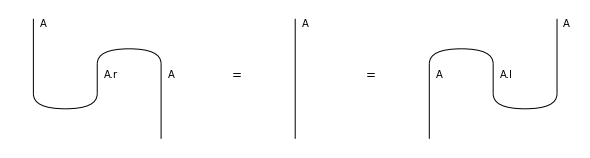

In [13]:
snake1 = Id(A) @ Cap(A.r, A) >> Cup(A, A.r) @ Id(A)
snake2 = Cap(A, A.l) @ Id(A) >> Id(A) @ Cup(A.l, A)

assert snake1.normal_form() == Id(A) == snake2.normal_form()
print('Snake Equations - For any object', A, ':')
drawing.equation(snake1, Id(A), snake2, figsize=(8, 2))

<div class="alert alert-info">
    
**Note**    

The [.normal_form()](https://discopy.readthedocs.io/en/main/_autosummary/discopy.rigid.Diagram.html#discopy.rigid.Diagram.normal_form) method used above also applies on standard monoidal diagrams. 
    
</div>

Nested cups and caps can be created using the [Diagram.cups()](https://discopy.readthedocs.io/en/main/_autosummary/discopy.rigid.Diagram.html#discopy.rigid.Diagram.cups), [Diagram.caps()](https://discopy.readthedocs.io/en/main/_autosummary/discopy.rigid.Diagram.html#discopy.rigid.Diagram.caps) methods.

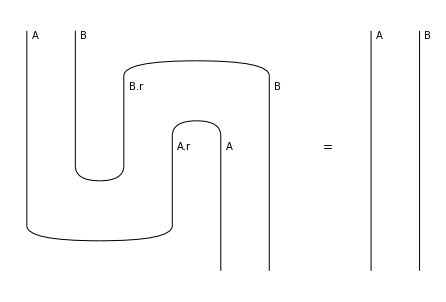

In [14]:
from discopy.rigid import Diagram

A, B = Ty('A'), Ty('B')

nested_cup = Diagram.cups(A @ B, (A @ B).r)
nested_cap = Diagram.caps((A @ B).r, A @ B)

nested_snake = Id(A @ B) @ nested_cap >> nested_cup @ Id(A @ B)

assert nested_snake.normal_form() == Id(A @ B)
drawing.equation(nested_snake, nested_snake.normal_form())